# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [78]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from pandas import DataFrame



In [79]:
data = pd.read_csv('Customer data.csv')
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [80]:
def reading_data(path):
    data = pd.read_csv('Customer data.csv')  # reading csv file
    first_row = []
    # appending first row in a list
    for i in range(0, 7):
        first_row.append(float(data.columns[i]))

    data.loc[-1] = first_row  # adding a row
    data.index = data.index + 1  # shifting index
    data = data.sort_index()  # sorting indexes

    data.columns = ["ID", "Sex", "Marital status", "Age", "Education","Income","Occupation", "Settlement size"]  # assigning column names
    return data

In [81]:
def scatter_plot(plotted_df):
    fig, ax = plt.subplots()
    # selecting x and y axises without labels
    ax.scatter(plotted_df['x'], plotted_df['y'], c='y', s=0.5)
    plt.xlabel('x')  # entering name for x axis
    plt.ylabel('y')  # entering name for y axis
    plt.title("Dataset")  # entering a title for plot
    plt.show()

In [83]:
X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

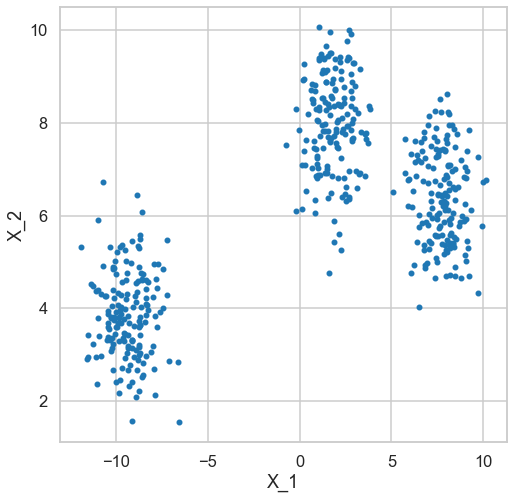

In [84]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [85]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 

    return Cluster_Distance 

# calculates euclid distance for two points
def euclid_calculator(x1, y1, x2, y2):
    distance = np.sqrt(np.square(abs(x1 - x2)) + np.square(abs(y1 - y2))) # euclid distance formula
    return distance


def calculate_dist(df_dist, x_list, y_list, k):
    obj_func = {} # stores object functions for each distances
    total_points = {} # stores all data points for each cluster centroids
    # creates points with names according to number of k
    for x in range(1, k + 1):
        name = 'point_'
        obj_func[name + str(x)] = 0
        total_points[name + str(x)] = []

    for index, row in df_dist.iterrows():
        points_distance = {}
        for x in range(1, k+1):
            name = 'point_'
            points_distance[name + str(x)] = 0
        for x, y, point in zip(x_list, y_list, points_distance.keys()):
            distance = euclid_calculator(x, y, row['x'], row['y']) # calculates distance for determine point is close to which center
            df_dist.loc[index, point] = distance # stores points with distances
            points_distance[point] = distance

        # sorts for finding every point close to which center
        sorted_dist = sorted(points_distance.items(), key=lambda kv: kv[1])
        point = [row['x'], row['y']]
        point_type = sorted_dist[0][0]
        obj_func[point_type] += np.square(sorted_dist[0][1])
        df_dist.loc[index, 'point_type'] = point_type
        total_points[point_type].append(tuple(point))

    return df_dist, total_points, obj_func

def total_dist(dist):
    dist_sum = 0
    for item in dist:
        dist_sum += item
    return dist_sum

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [86]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

In [87]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [88]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [89]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [90]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [91]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

In [92]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

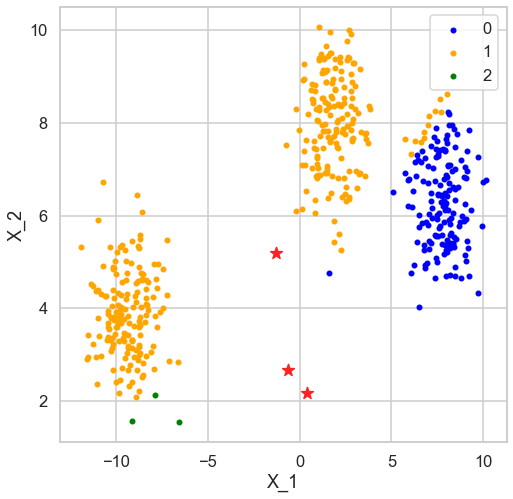

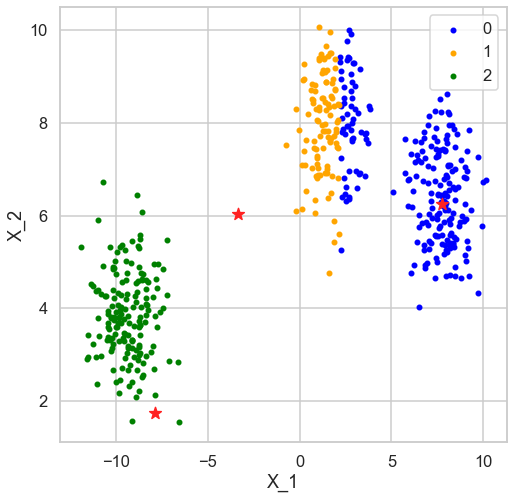

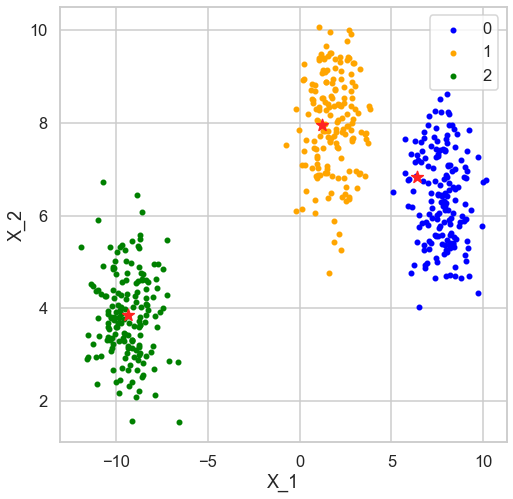

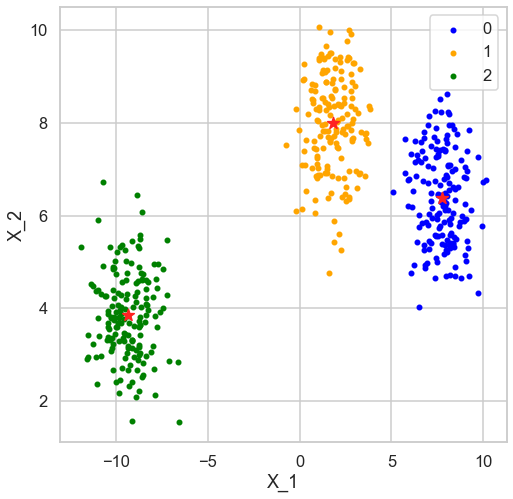

In [93]:
cluster = k_means(3, X_train)

In [94]:
#def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
       # write your your loop 
    
   # return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [95]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [96]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

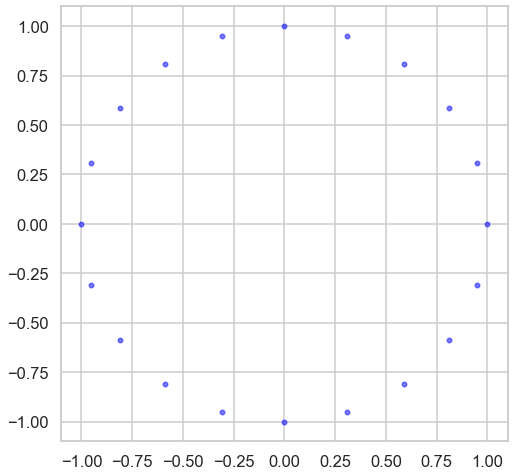

In [97]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

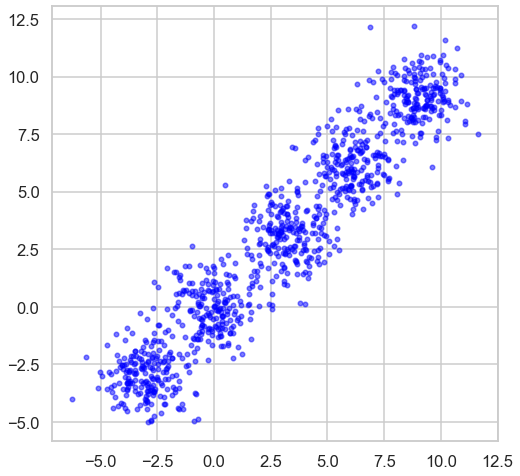

In [98]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

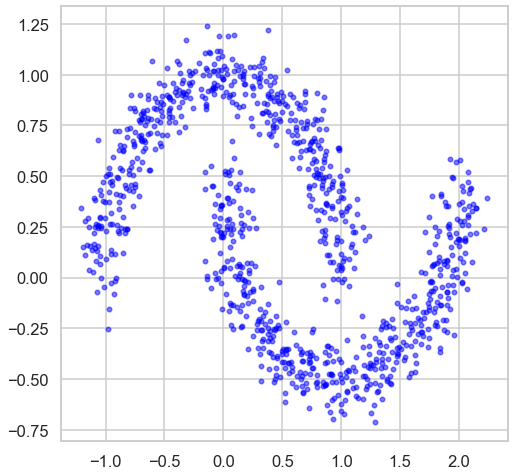

In [99]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

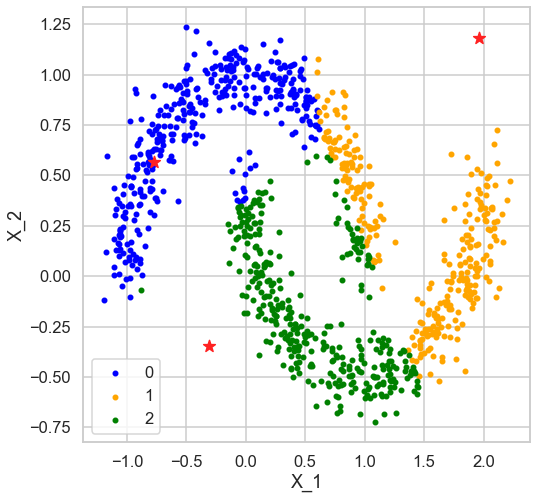

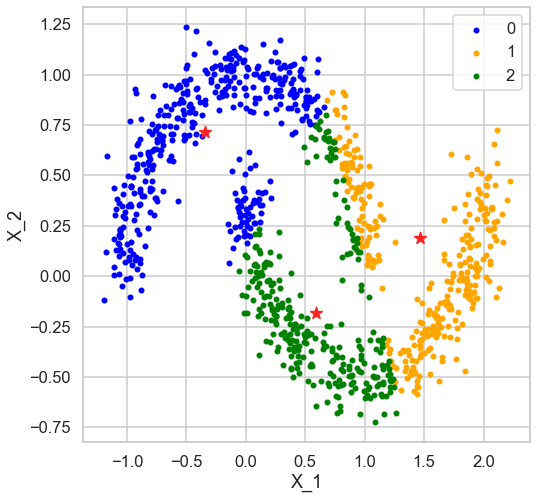

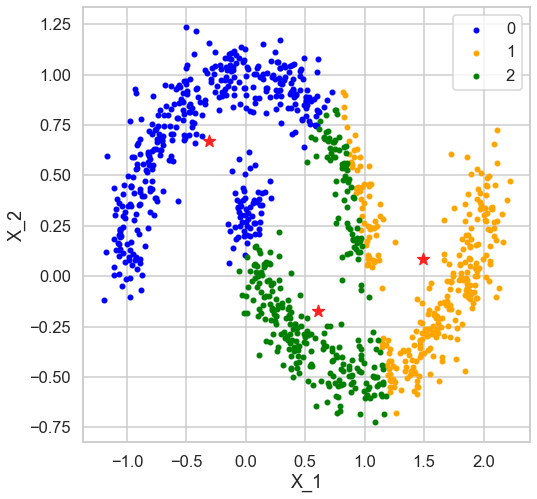

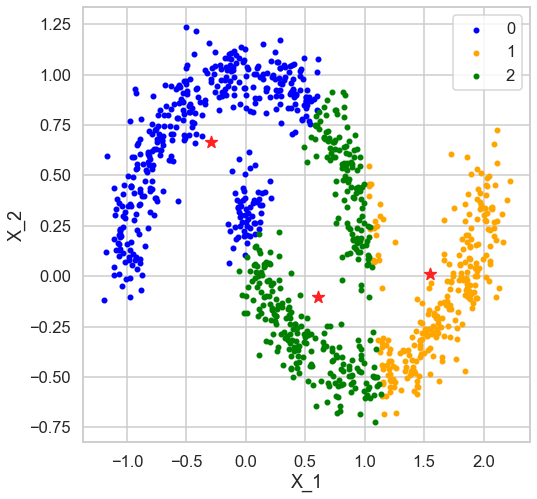

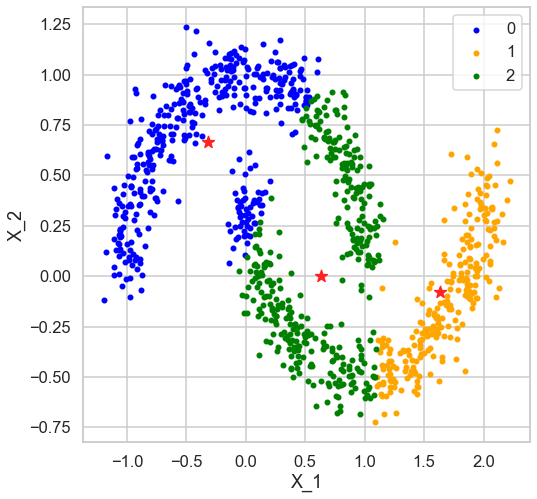

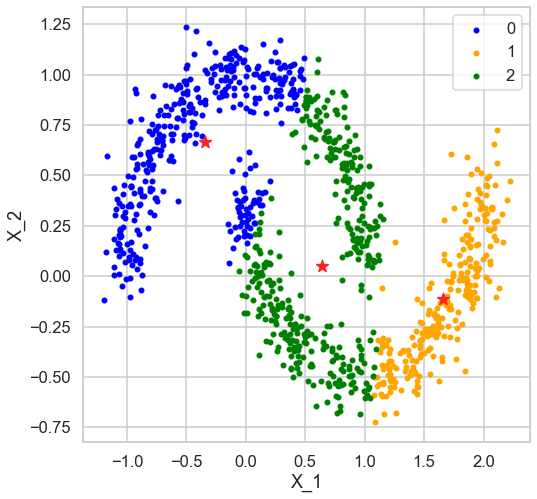

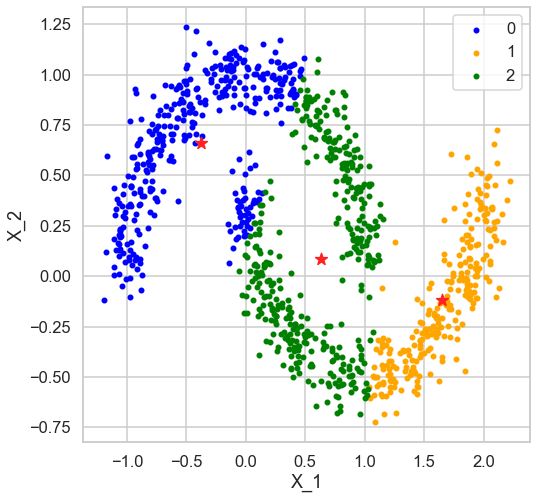

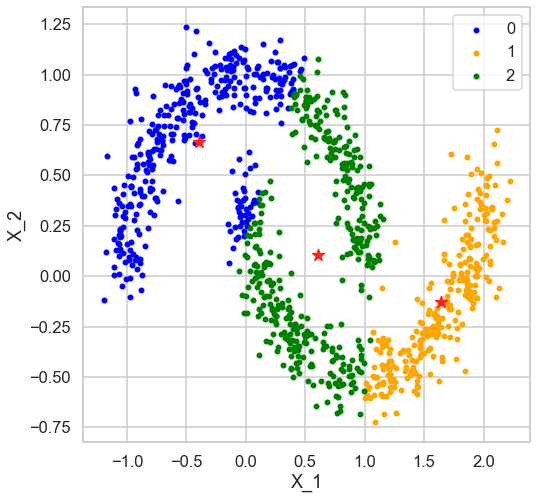

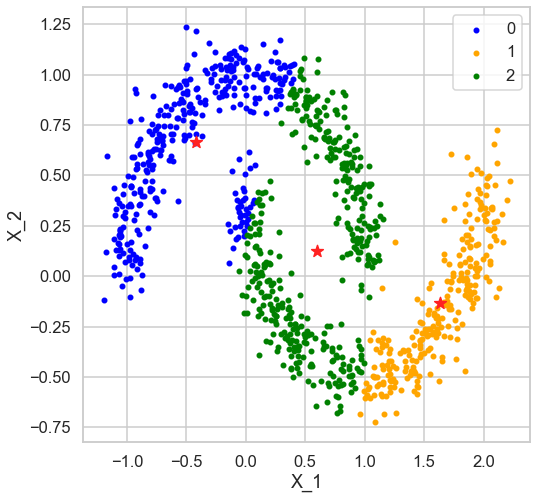

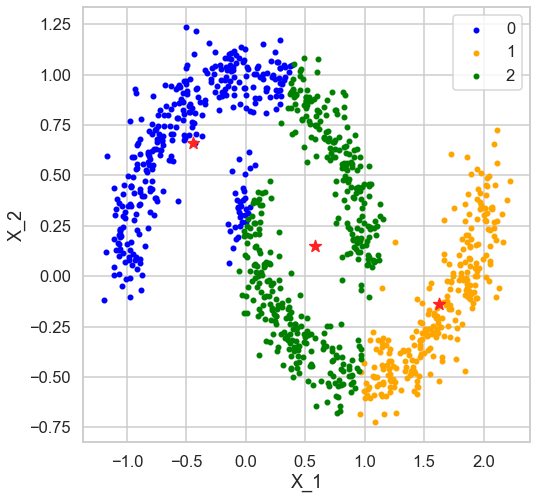

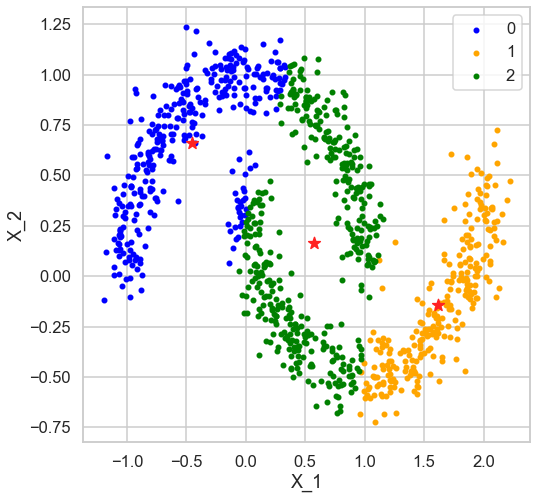

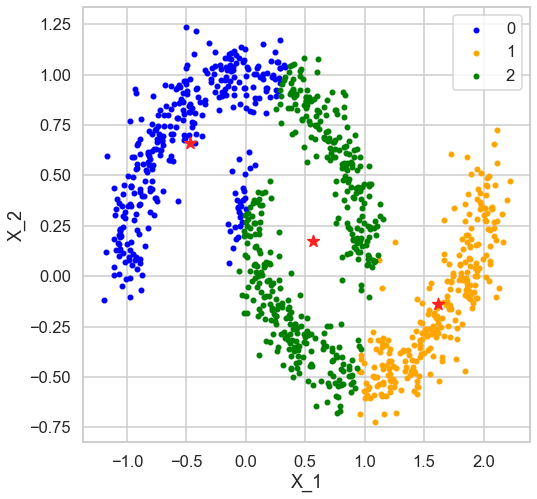

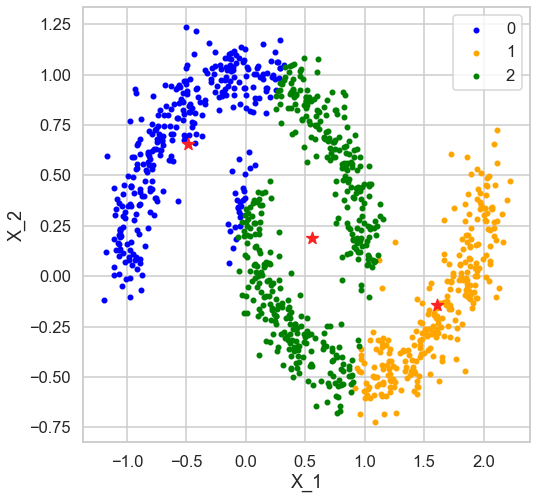

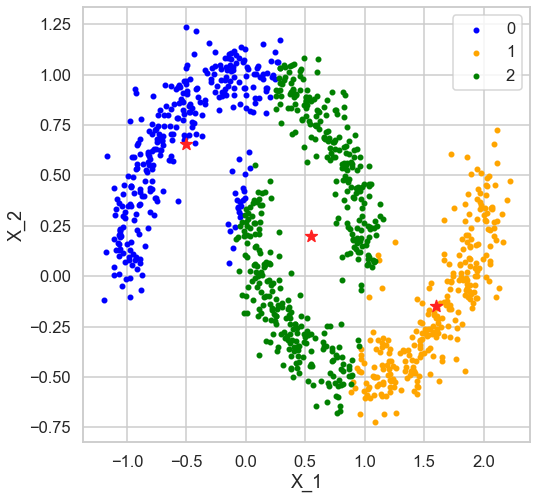

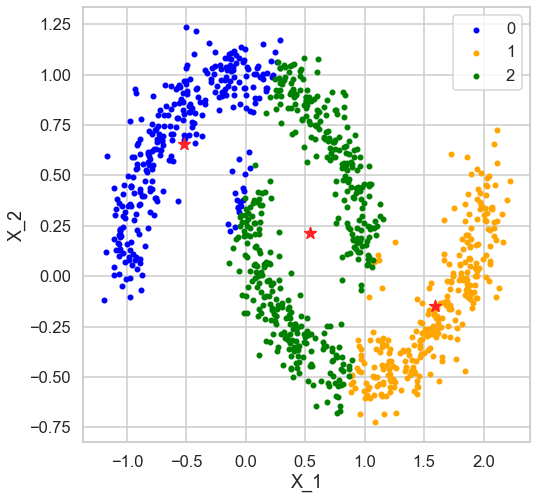

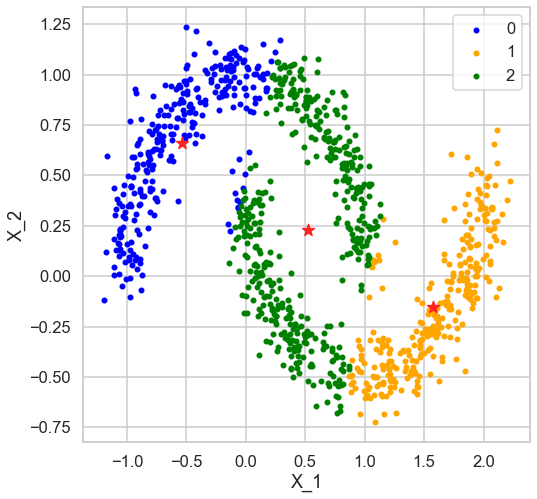

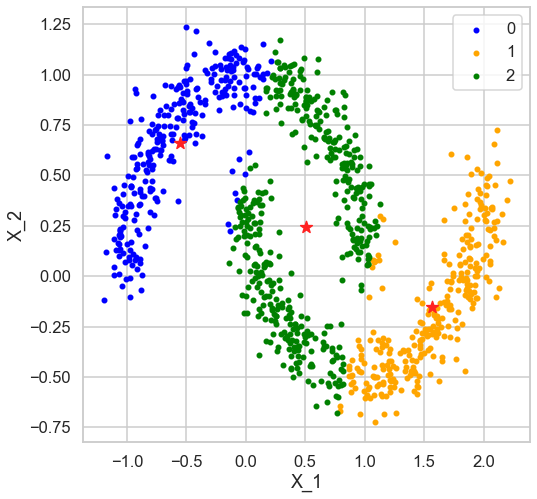

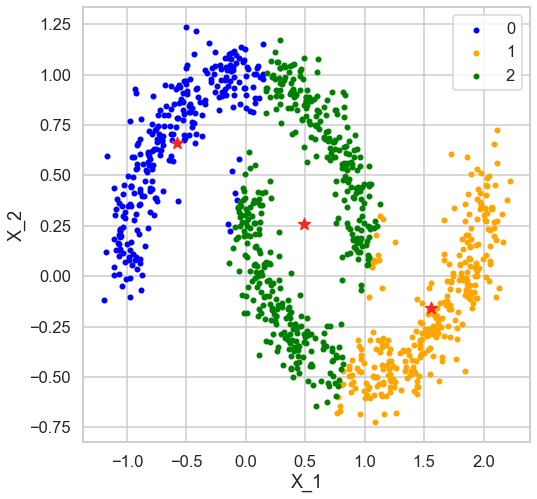

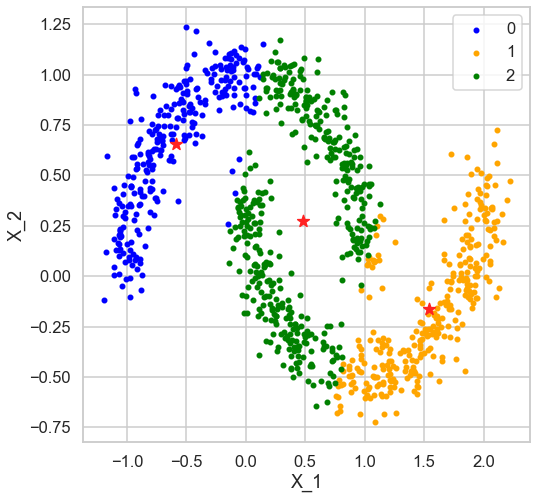

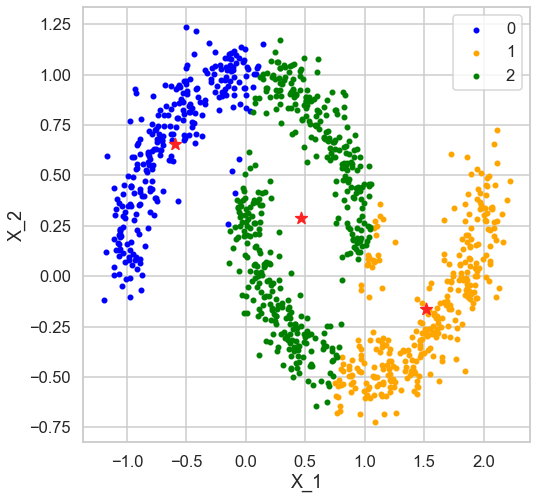

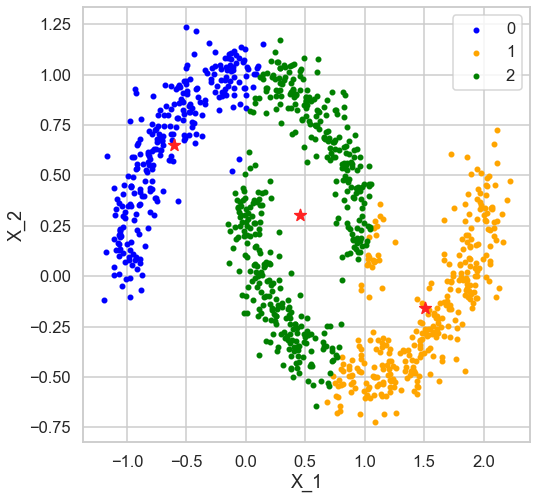

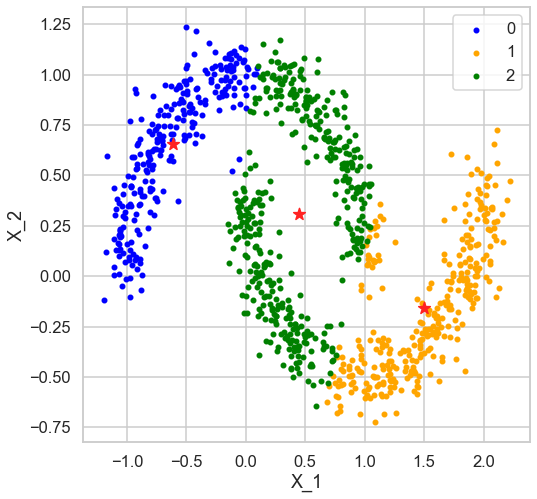

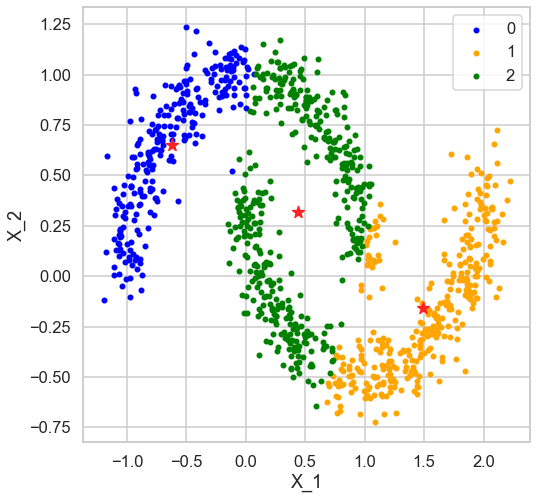

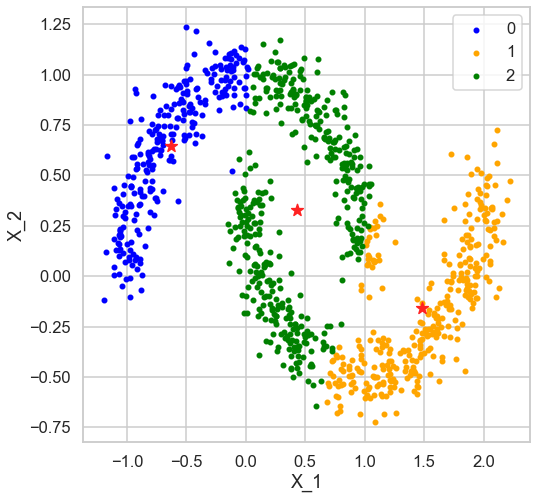

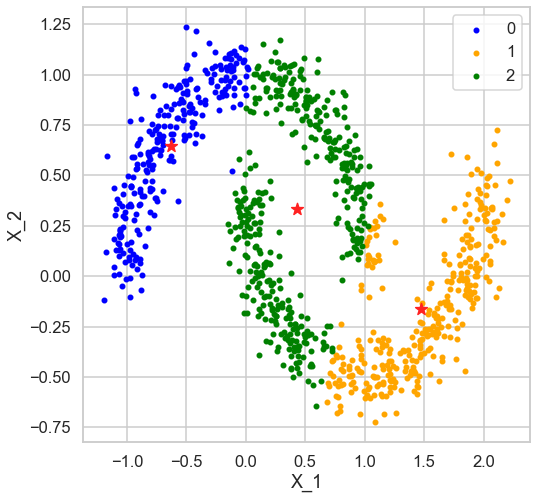

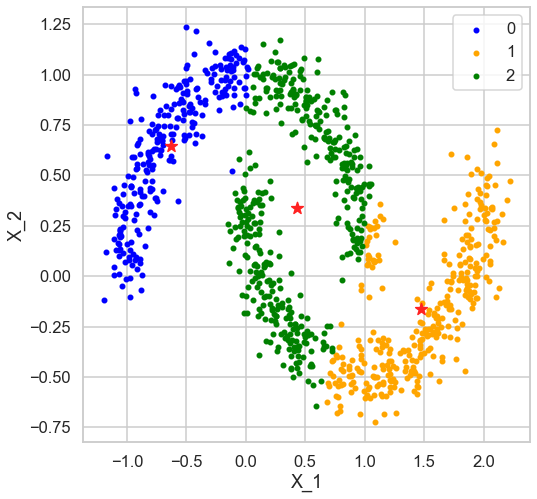

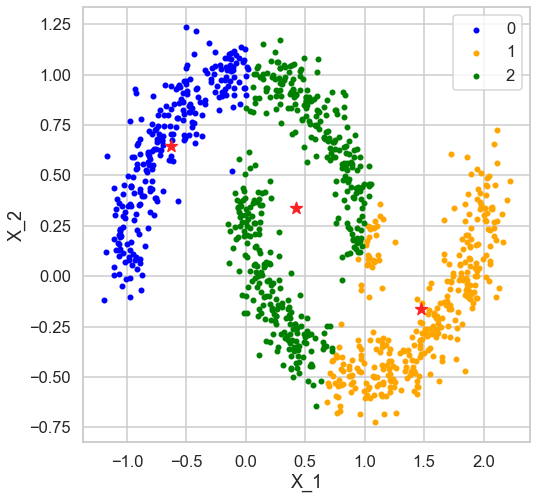

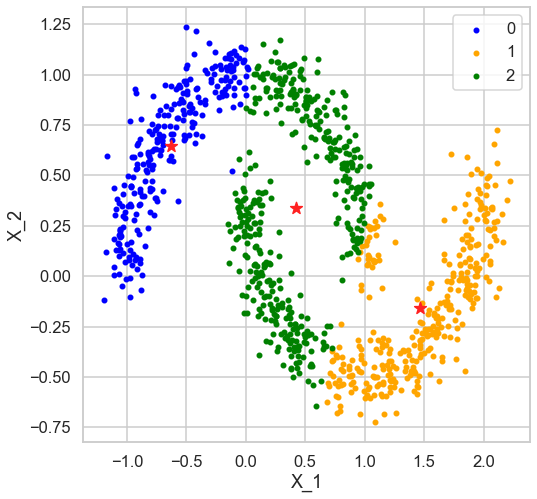

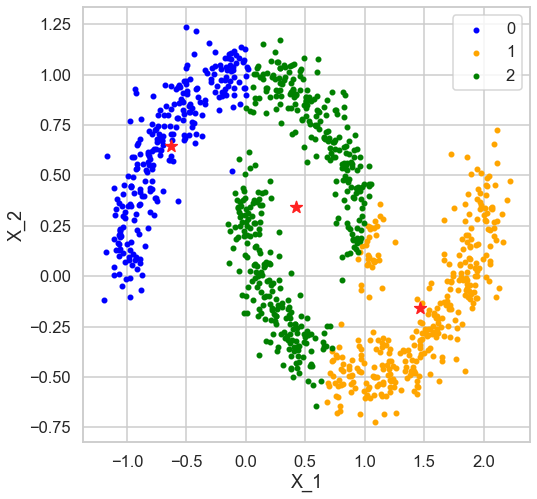

In [100]:
n_samples = 1000
example3, _ =noisy_moons = make_moons(n_samples=n_samples, noise= .1)
cluster = k_means(3, example3)

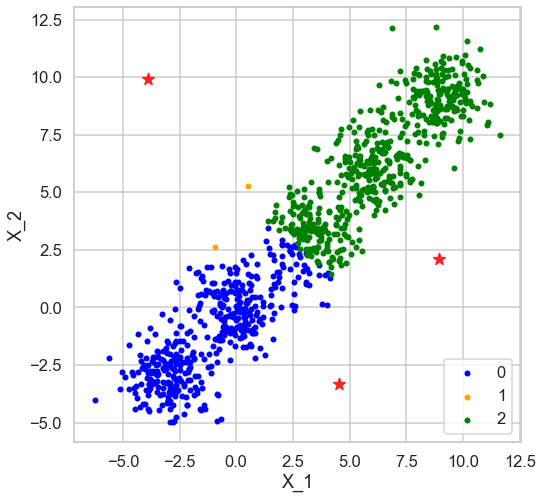

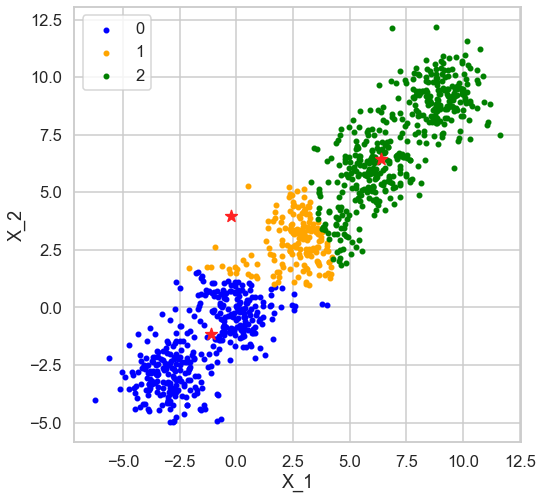

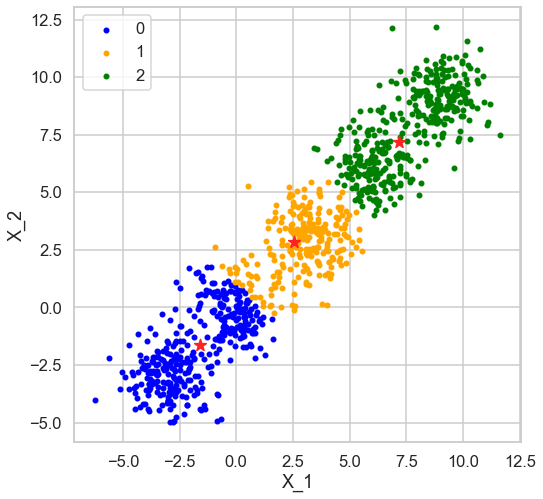

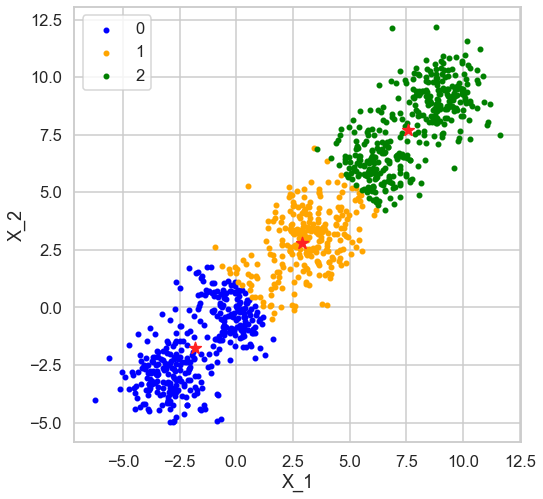

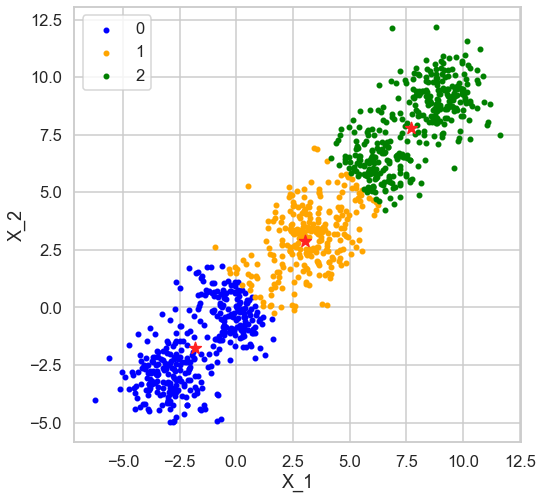

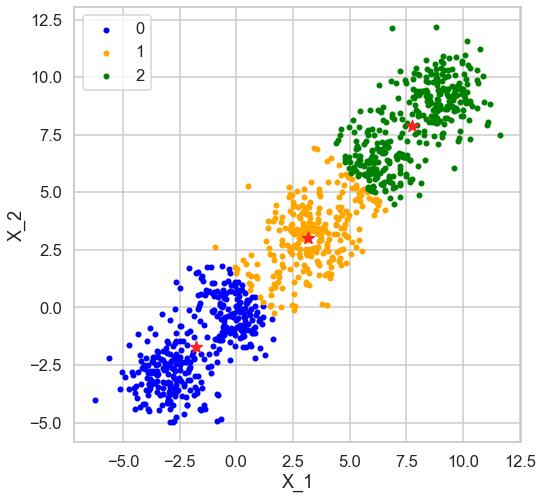

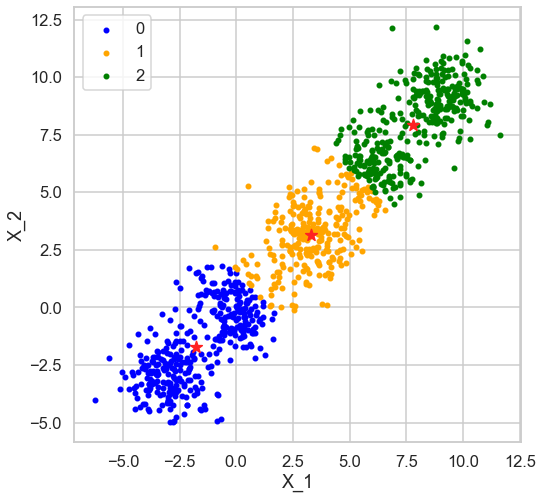

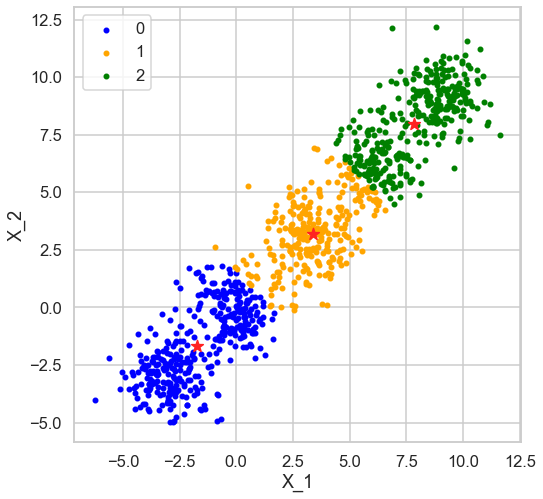

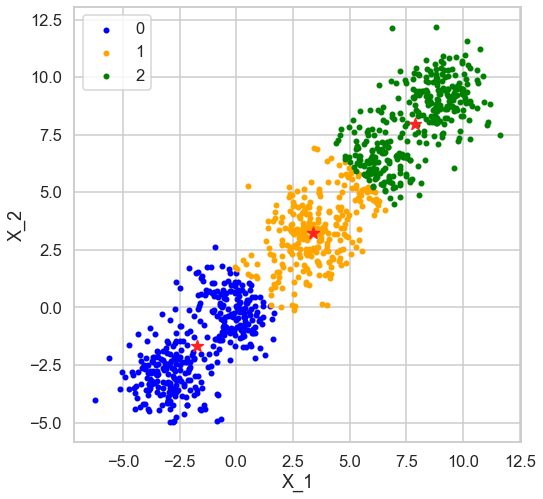

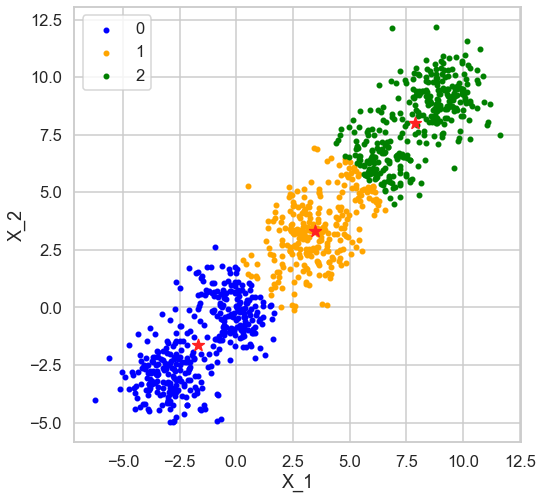

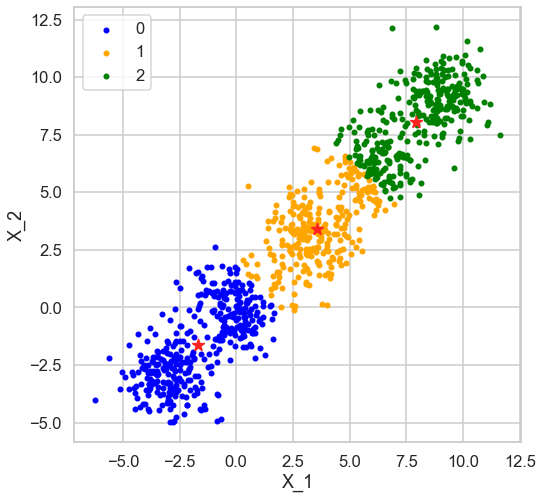

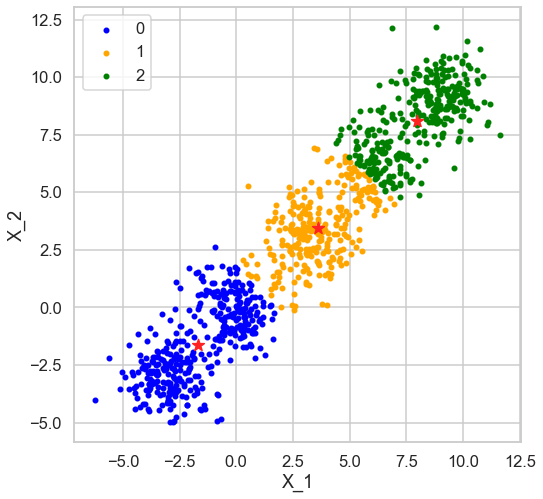

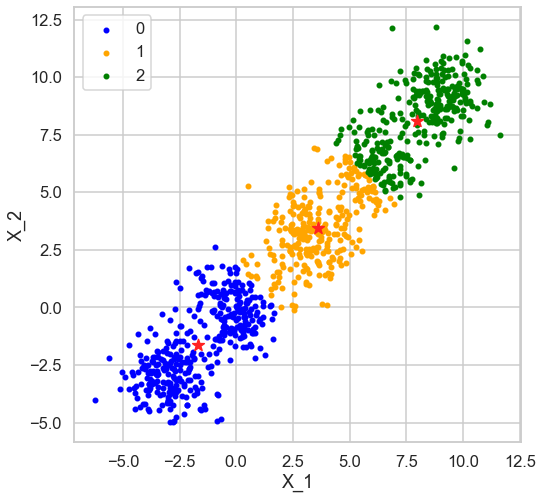

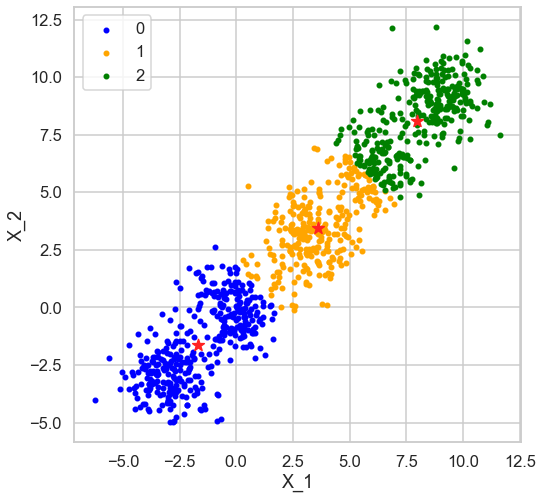

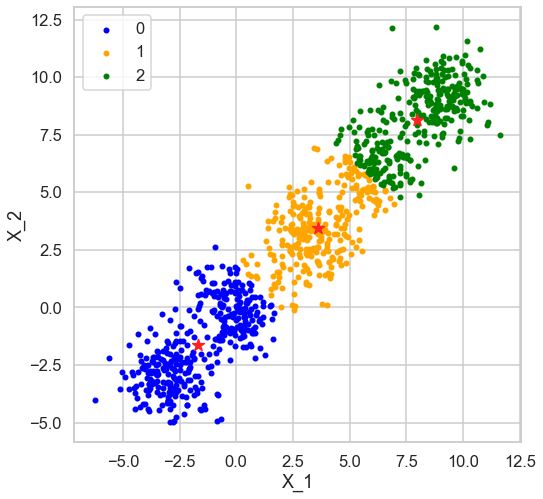

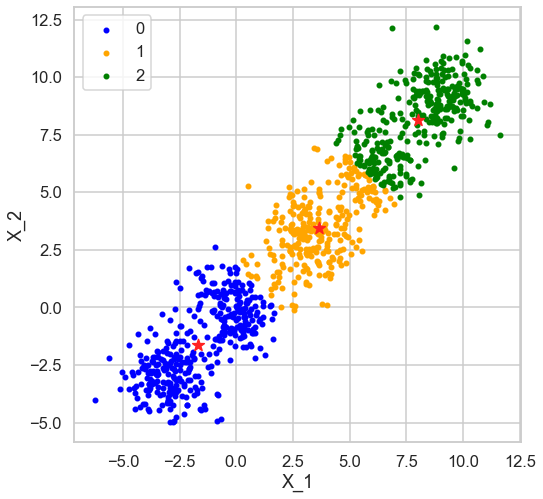

In [101]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
example2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
cluster = k_means(3, example2)

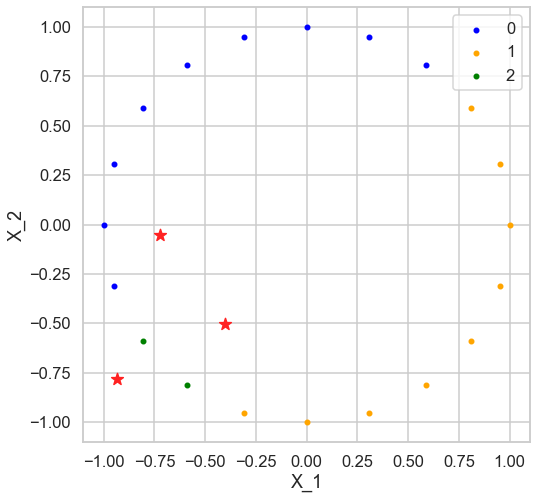

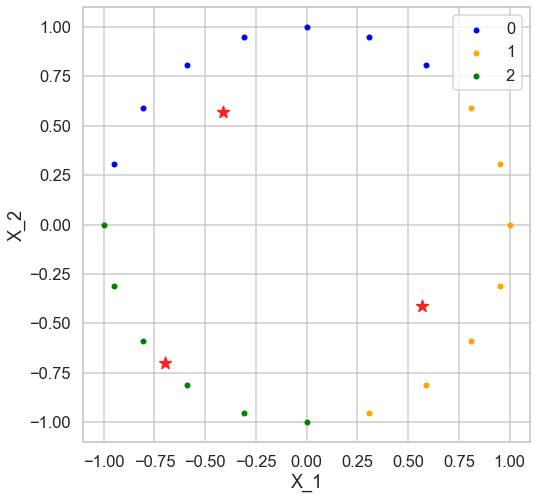

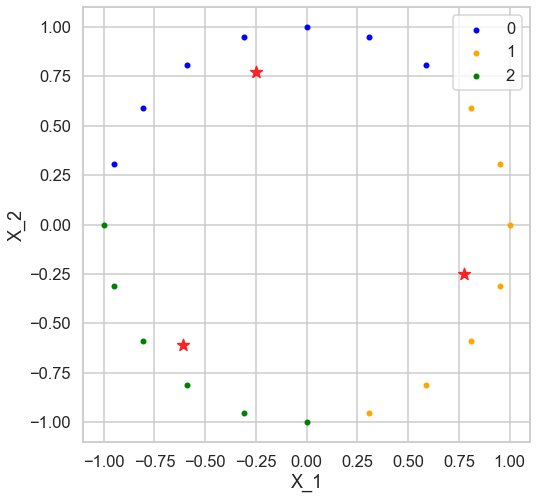

In [102]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
example1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
cluster = k_means(3, example1)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 